# Black Friday Sales Prediction

The dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand our feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 537,577 rows and 12 columns.

This project analyzes the Black Friday sales data and tries to answer these key business questions :
1.	What are maximum products sold?
2.	Which Product category has highest sales?
3.	Finding the buyer's age group and their product of interest.
4.	Finding the marital status of the buyers.
5.	Analyzing the gender group, which has high interest in the sales

This can be used to understand the customer purchase behaviour (specifically, purchase amount) against various features like Products of different Categories, Gender, Age, Occupation of Customer, etc. 

This project also aims at creating a simple predicting model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data Dictionary :

| Variable                     | Definition                                |
| :----------------------------| :-----------------------------------------| 
| User_ID                      | User ID                                   | 
| Product_ID                   | Product ID                                |
| Gender                       | Sex of the User                           |
| Age                          | Age of the User(in bins)                  |
| Occupation                   | Occupation of the User (Masked)           |
| City_Category                | Category of City(A,B,C)                   |
| Stay_In_Current_City_Years   | Number of years of stay in Current City   |
| Marital_Status               | Marital Status of the User                |
| Product_Category_1           | Product Category 1(Masked)                |
| Product_Category_2           | Product Category 2(Masked)                |
| Product_Category_3           | Product Category 3(Masked)                |
| Purchase                     | Purchase Amount(Target Variable)          |

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset
sales_data = pd.read_csv("BlackFriday.csv")

In [3]:
sales_data.shape

(537577, 12)

In [4]:
#Description of the data set
sales_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
#Look at the data types
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB



The dataset contains three different datatypes :

- 2 columns with float64
- 5 columns with int64
- 5 columns with object

There are two types of data - Quantitative and Categorical. Quantitative data have numerical values, whereas, the Categorical data are used to label a set of items or a group.

In our dataset - All variables except Age, Gender, City_Category, Stay_In_Current_City_Years are categorical (Nominal) data. We need to process them before performing any ML algorithm. We will discuss this in the later section

In [6]:
#View first few records
sales_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
#view last few records
sales_data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


## Correlation Plot
Let us plot a correlation plot to check the correlation between the variables in the data set.

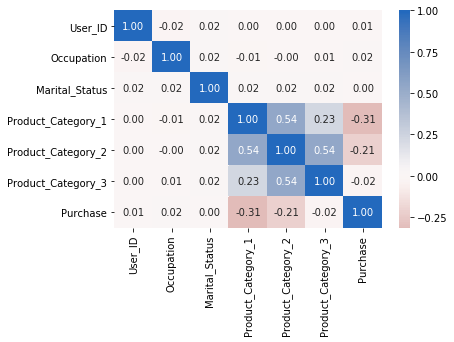

In [8]:
sns.heatmap(sales_data.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

From the above plot, we can see that, the correlation between Product Category_1, Product Category_2 and Product Category_3 is greater than 0.5 which means these **variables are moderately correlated**.

## Addressing the Null and NA values :

In [9]:
#Insights on NaN values
sales_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [10]:
#Let us check the values counts on product category trend
sales_data["Product_Category_1"].value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [11]:
sales_data["Product_Category_2"].value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [12]:
sales_data["Product_Category_3"].value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

In [13]:
# Copying the original data frame, so that changes made in copy will not impact the original version
sales_data_copy = sales_data.copy()

In [14]:
print ("Shape of Original df:{}".format(sales_data.shape))
print ("Shape of Copy df_copy:{}".format(sales_data_copy.shape))

Shape of Original df:(537577, 12)
Shape of Copy df_copy:(537577, 12)


In [15]:
sales_data_copy.dropna(inplace=True)

In [16]:
print ("Shape of Original df:{}".format(sales_data.shape))
print ("Shape of Copy df_copy:{}".format(sales_data_copy.shape))

Shape of Original df:(537577, 12)
Shape of Copy df_copy:(164278, 12)


In [17]:
sales_data_copy[["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]].head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
1,P00248942,1,6.0,14.0
6,P00184942,1,8.0,17.0
13,P00145042,1,2.0,5.0
14,P00231342,5,8.0,14.0
16,P0096642,2,3.0,4.0


In [18]:
print("Shape of the original data set : {}".format(sales_data.shape))
print("Shape of the NaN removed data set : {}".format(sales_data_copy.shape))

Shape of the original data set : (537577, 12)
Shape of the NaN removed data set : (164278, 12)


In [19]:
#df_copy.dropna().shape[0]/df_copy.shape[0]
print ("Propotion of missing values in df :{0:.2f}".format((sales_data.shape[0] - sales_data_copy.shape[0])/sales_data.shape[0]))

Propotion of missing values in df :0.69


Removing the NaN values will result in 70% loss of data from the data set. This results in the model being biased and it would be underfit.The available alternate approaches are replacing the missing values with mean, mode or fill it with 0. 

The values in Product_Catgeory_2  and Product_Catgeory_3 coulmns are interlinked with values present in Product_Catgeory_1, hence replacing it with mean/mode is not a good strategy.

Thus, we will fill the Nan values with 0.

In [20]:
#Fill na with Zero
sales_data.fillna(0, inplace=True)

In [21]:
sales_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [22]:
sales_data.to_csv('sales_data.csv')

## Exploratory Data Analysis
Let us now see how the independent variables are related to the dependent variable by plotting graphs using the matplotlib library in Python.

In [23]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [24]:
sales_data['User_ID'].nunique()

5891

In [25]:
sales_data['Product_ID'].nunique()

3623

The nunique() method gives us the uniques values present in the column. 

From the User_ID, we can conclude that in this specific retail store, during Black Friday, 5,891 different customers have bought something from the store. 

Also, from the Product_ID, we can see that there are 3,623 different products that have been sold.

### Distribution of the Target Variable :

Text(0.5, 1.0, 'Purchase amount Distribution')

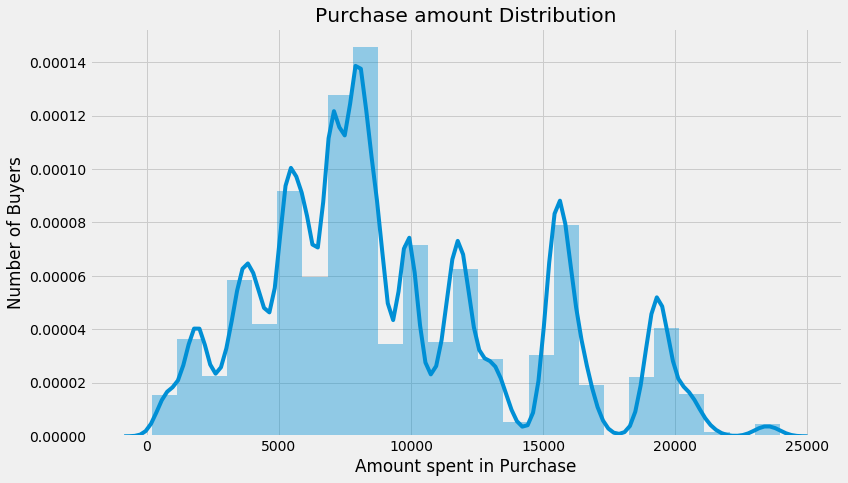

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(sales_data.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [27]:
#Skew and Kurtosis
print ("Skew is:", sales_data.Purchase.skew())
print("Kurtosis: %f" % sales_data.Purchase.kurt())

Skew is: 0.6242797316083074
Kurtosis: -0.343121


It seems like our target variable has an almost Gaussian distribution.

### Most Purchased Products :

In [28]:
#Top 10 poducts sold
top_10 = sales_data["Product_ID"].value_counts(sort=True)[:10]
top_10

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
Name: Product_ID, dtype: int64

In [29]:
#Defining a simple bar plot function
def simple_bar_plot(data, title = None):
    data.plot("bar", title = title)

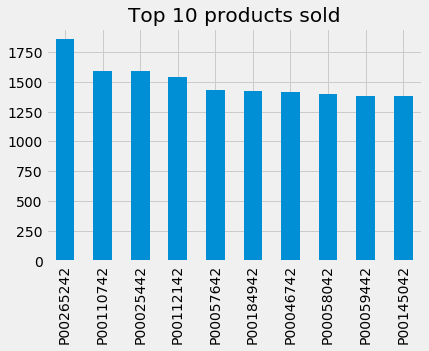

In [30]:
#plotting the top 10 products sold
simple_bar_plot(sales_data["Product_ID"].value_counts(sort=True)[:10], title = "Top 10 products sold")

We can see from the above graph that, the top 10 products are sold more than 1200 in quantity. The description of the products, is however not present in the dataset. But let us see what all product category that interested the people.

### Maximum sold Product Category :

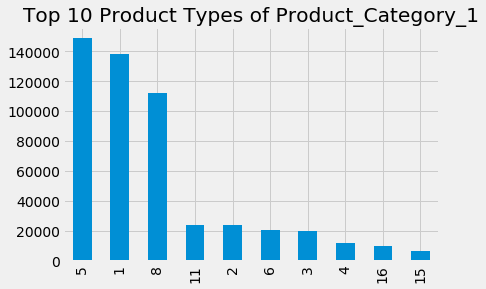

In [31]:
#for Product_Category_1
simple_bar_plot(sales_data["Product_Category_1"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Types of Product_Category_1")

The highest selling product types of **Product_Category_1 are 5, 1, and 8** which are worth more than 100k.

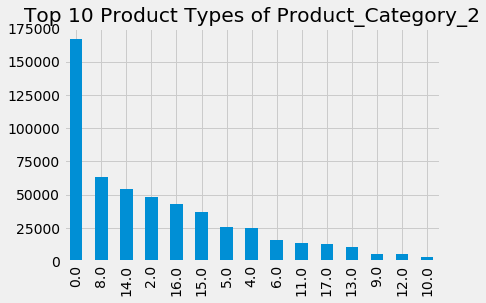

In [32]:
#for Product_Category_2
simple_bar_plot(sales_data["Product_Category_2"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Types of Product_Category_2")

The highest selling product types of **Product_Category_2 is 0**, which is worth upto 160k. Product types 8, 14 and 2 have sold upto 50k.

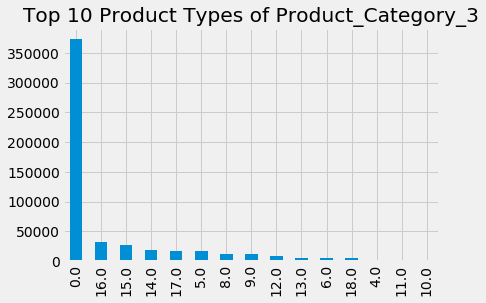

In [33]:
#for Product_Category_3
simple_bar_plot(sales_data["Product_Category_3"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Types of Product_Category_3")

The highest selling product types of **Product_Category_3 is 0**, which is worth upto 3500k. Product types 16, 15 and 14 have sold upto 40k.

### Men or Women, who are likely to spend more? 

In [34]:
#Defining the function count plot
def count_plot(dataframe, column_name, title =None, hue = None):
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)

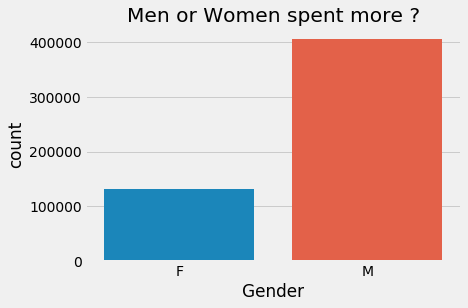

In [35]:
#Check who purchases more
count_plot(sales_data,"Gender","Men or Women spent more ?")

From this, we can see that the number of male customers is almost 3 times higher than the number of female customers. This could mean that, Men are most likely to buy during the Black Friday sales.

### Age of the Customers :

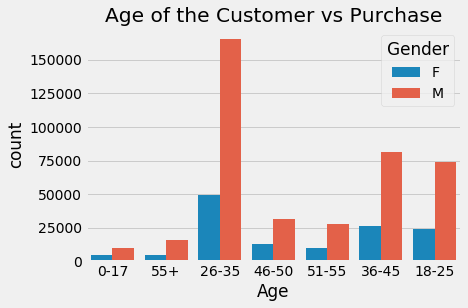

In [36]:
count_plot(sales_data,"Age","Age of the Customer vs Purchase","Gender")

From the graph, we see that the Majority of customers are from the age group of 26-35.
We can also check the majority of a gender among the age groups by adding a hue. And as seen above, more Men spent in the sale than Women.

### Married or Individuals, who spends more?

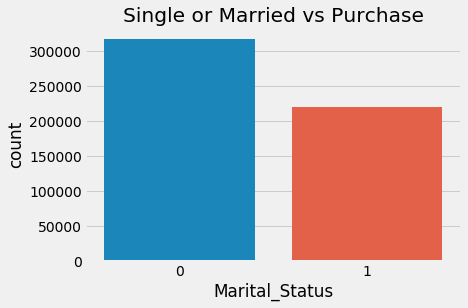

In [37]:
count_plot(sales_data,"Marital_Status","Single or Married vs Purchase")

From the above graph, we can see that, Single customers purchased more than Married Customers.

### Occupation of the Customers :

In [38]:
#Defining unique function
def unique(col):
    x = np.array(col)
    print(np.unique(x))

In [39]:
print("The unique IDs of Customer Occupations are:")
unique(sales_data['Occupation'])

The unique IDs of Customer Occupations are:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


We can see there are 21 different occupation ID's are registered during the shopping day.

The Occupation number could represent different professions of customers: for example, number 1 could be an engineer, number 2 a doctor, number 3 an artist, etc.

It would be also interesting to see how much money each costumer group (grouped by occupation ID) spent. To do that, we can use a for loop and sum the spent money for each individual occupation ID.

In [40]:
occ_id = list(range(0, 21))
spent = []
for oid in occ_id:
    spent.append(sales_data[sales_data['Occupation'] == oid]['Purchase'].sum())

spent

[625814811,
 414552829,
 233275393,
 160428450,
 657530393,
 112525355,
 185065697,
 549282744,
 14594599,
 53619309,
 114273954,
 105437359,
 300672105,
 71135744,
 255594745,
 116540026,
 234442330,
 387240355,
 60249706,
 73115489,
 292276985]

We have created a list **spent**, which includes summed quantities of dollars for the Occupations IDs - from 0 to 20. 

It may seem odd in the results that hundreds of millions of dollars are spent. But, keep in mind that our dataset includes 500,000 observations, so this is actually very likely. Or maybe the retail store is actually a big shopping mall. Another explanation for the huge sums of money spent by each occupation is that this data may represent the transactions for multiple Black Friday nights, and not just one.

Now, we have information about how much money is spent per occupation category. Let us graphically plot this information.

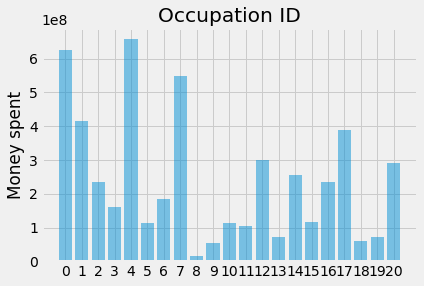

In [41]:
objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()

It can be easily observed that people with Occupation IDs **0 and 4 spent the most money** during Black Friday sales. 

On the other hand, the people with Occupation IDs **8, 9, and 18 have spent the least** amount of money. 

It can imply that these groups are the poorest ones, or contrary, the richest people who don't like to shop in that kind of retail stores. We have a deficiency with information to answer that question, and because of that, we would stop here with the analysis of the Occupation category.

### City Category :

In [42]:
sales_data['City_Category'].nunique()

3

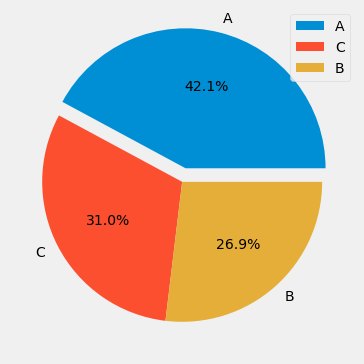

In [43]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(sales_data['City_Category'].value_counts(), explode=explode, labels=sales_data['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

It is evident from the pie chart that all the three cities are almost equally represented in the retail store during Black Fridays. Maybe the store is somewhere in between these three cities, is easily accessible and has good road connections from these cities.

## Data Pre-processing :

User_ID is is the number assigned automatically to each customer, and it is not useful for prediction purposes.

The Product_ID column contains information about the product purchased. It is not a feature of the customer. Therefore, we will remove that too.

In [44]:
sales_data = sales_data.drop(['User_ID','Product_ID'], axis=1)
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 41.0+ MB


The data type of all the variables are different. We will convert all the variables to int to perform Linear Regression.

In [45]:
sales_data2 = sales_data

In [46]:
#Gender
sales_data2['Gender'] = sales_data2['Gender'].astype('category')
sales_data2['Gender'] = sales_data2['Gender'].cat.codes
#Age
sales_data2['Age'] = sales_data2['Age'].astype('category')
sales_data2['Age'] = sales_data2['Age'].cat.codes
#City_Category
sales_data2['City_Category'] = sales_data2['City_Category'].astype('category')
sales_data2['City_Category'] = sales_data2['City_Category'].cat.codes
#Stay_In_Current_City_Years
sales_data2['Stay_In_Current_City_Years'] = sales_data2['Stay_In_Current_City_Years'].astype('category')
sales_data2['Stay_In_Current_City_Years'] = sales_data2['Stay_In_Current_City_Years'].cat.codes
#Product_Category_1
sales_data2['Product_Category_1'] = sales_data2['Product_Category_1'].astype('category')
sales_data2['Product_Category_1'] = sales_data2['Product_Category_1'].cat.codes
#Product_Category_2
sales_data2['Product_Category_2'] = sales_data2['Product_Category_2'].astype('category')
sales_data2['Product_Category_2'] = sales_data2['Product_Category_2'].cat.codes
#Product_Category_3
sales_data2['Product_Category_3'] = sales_data2['Product_Category_3'].astype('category')
sales_data2['Product_Category_3'] = sales_data2['Product_Category_3'].cat.codes

In [47]:
sales_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null int8
Age                           537577 non-null int8
Occupation                    537577 non-null int64
City_Category                 537577 non-null int8
Stay_In_Current_City_Years    537577 non-null int8
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int8
Product_Category_2            537577 non-null int8
Product_Category_3            537577 non-null int8
Purchase                      537577 non-null int64
dtypes: int64(3), int8(7)
memory usage: 15.9 MB


## Multiple Linear Regression

Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. It represents a simple method for supervised learning and it is an effective tool for predicting quantitative responses. 

In [48]:
sales_data2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,2,0,0,8370
1,0,0,10,0,2,0,0,5,11,15200
2,0,0,10,0,2,0,11,0,0,1422
3,0,0,10,0,2,0,11,13,0,1057
4,1,6,16,2,4,0,7,0,0,7969


In [49]:
sales_data2.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [50]:
#Defining X and Y
X = sales_data2[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']]
Y = sales_data2['Purchase']

In [51]:
#Splitting the dataset into test and train sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [52]:
#Using OLS model
import statsmodels.api as sm
model = sm.OLS(y_train,x_train)
result = model.fit()

In [53]:
#Coefficients
result.params

Gender                        2909.366389
Age                            764.171968
Occupation                      83.842904
City_Category                 1255.921378
Stay_In_Current_City_Years     674.906147
Marital_Status                 354.098586
Product_Category_1             -70.941460
Product_Category_2             102.818209
Product_Category_3             302.702458
dtype: float64

In [54]:
predictions = result.predict(x_test)

In [55]:
predictions

82060     11825.168848
297741     6671.672338
414797     5544.894509
7125       3421.511416
8665       7543.707627
390258     3997.471072
160756    11444.342296
222230     6847.581916
28305     10323.135901
265654    12561.667873
204636     7098.578175
453849     4684.398227
115450     7714.984075
424532     4495.566704
178891    12930.323342
109712    11822.230045
91126      5844.679787
497416     5753.897257
147293     9260.623278
20744      8053.721759
191720    12853.752768
255256    12655.711300
484189     9694.650190
191351    10441.106855
118150    11996.383059
512731    12516.343744
159813    10992.281590
194624    10268.776593
41647      8307.786649
331260     7632.038752
              ...     
460822    13832.380546
131536     9800.225753
175314    11670.641897
190364     9528.483435
171074    12340.731319
467538     6853.569072
317290     7835.226390
387689     9790.579571
115763    10432.069273
77976      9904.955884
41156      7208.105018
80411     10469.139891
297351     

In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Purchase   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                          1.117e+05
Date:                Fri, 21 Aug 2020   Prob (F-statistic):                        0.00
Time:                        15:04:11   Log-Likelihood:                     -3.2186e+06
No. Observations:              322546   AIC:                                  6.437e+06
Df Residuals:                  322537   BIC:                                  6.437e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender                      2909.3664     19.363    150.252      0.000    2871.415    2947.318
Age                          764.1720      6.776    112.776      0.000     750.891     777.453
Occupation                    83.8429      1.393     60.172      0.000      81.112      86.574
City_Category               1255.9214     11.685    107.485      0.000    1233.020    1278.823
Stay_In_Current_City_Years   674.9061      6.656    101.404      0.000     661.861     687.951
Marital_Status               354.0986     19.609     18.058      0.000     315.665     392.532
Product_Category_1           -70.9415      2.453    -28.917      0.000     -75.750     -66.133
Product_Category_2           102.8182      1.523     67.501      0.000      99.833     105.804
Product_Category_3           302.7025      1.928    156.975      0.000     298.923     306.482
==============================================================================
Omnibus:                     8150.482   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8780.360
Skew:                           0.400   Prob(JB):                         0.00
Kurtosis:                       3.115   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
input_for_predict = sales_data2.loc[[2,3], ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']]
input_for_predict.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
2,0,0,10,0,2,0,11,0,0
3,0,0,10,0,2,0,11,13,0


In [58]:
mlr_predict = result.predict(input_for_predict)
mlr_predict = pd.Series(mlr_predict.to_numpy().astype(int))
mlr_predict.head()

0    1407
1    2744
dtype: int32

In [59]:
y_observed = sales_data2.loc[[2,3],['Purchase']]
y_observed.head()

,Purchase
2,1422
3,1057


### Performance Estimation of the model :
In the end, it is always good to estimate our results by finding the mean absolute error (MAE) and mean squared error (MSE) of our predictions.

In [60]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 4066.9947019742367
MSE: 27093812.999168575


### Inference from Multiple linear regression :
- p-value ≤ 0.05 indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
- All variables except the Product_Category_1 are positively associated with Sales.
- R-squared score is **0.757**, which means that this model explains 75% of the total variance.

## Collinearity and Regularization :

What if the independent variables are not independent of each other i.e. collinearity or multicollinearity is present among the predictor variables.  We check the same using VIF( Variance inflation factor).


In [61]:
X = sales_data2[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']]
Y = sales_data2['Purchase']

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Gender                        3.350587
Age                           4.388604
Occupation                    2.482402
City_Category                 2.682763
Stay_In_Current_City_Years    2.684237
Marital_Status                1.862445
Product_Category_1            2.321700
Product_Category_2            1.970802
Product_Category_3            1.498102
dtype: float64

We can see from the VIF check that there is no collinearity among the dependent variables which has a significant range except for the Age and Gender column, but it is not severe.
When predictor variables are related, they fit well into a straight regression line that passes through many data points
It is difficult to ascertain reliable estimates of each coefficients for the predictor variables which results in incorrect conclusions.

In these cases stated above Lasso, Ridge and Elastic Net Regression comes into play to combat variance problems.


## Ridge Regression :

Ridge Regression: It helps reduce Variance by shrinking parameters and making predictions less sensitive. It can find solution with Cross validation and Ridge Regression Penalty. Better when all variables are useful.  Since in our dataset, we could see that all the variables are important hence we use Ridge for regularization.


In [63]:
from sklearn import linear_model, preprocessing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

a_train, a_test, b_train, b_test = train_test_split(X, Y, test_size=0.4)

rr = Ridge(alpha=10, normalize=True)# higher the alpha value, more restriction on the coefficients, with larger alpha
#the flexibility of the fit would be very strict.
result1=rr.fit(a_train, b_train)

b_pred = rr.predict(a_test)
newly= rr.score(a_test,b_pred)
#r2_score(b_test,b_pred)

In [64]:
mse = np.mean((b_pred - b_test)**2)
mse

24043290.689639166

In [65]:
prediction_rr = rr.predict(a_test)
prediction_rr

array([9237.702802  , 9478.30518341, 9260.34223041, ..., 9308.33468996,
       9601.39704629, 9107.29691367])

## Conclusion :

•	We could answer all the questions in our problem statement like –

1.	What are Top 10 products sold?


    P00265242, P00110742, P00025442, P00112142, P00057642, P00184942, P00046742, P00058042, P00059442, P00145042.


2.	Which Product category has highest sales?

    **Product Category 1 – 5, 1, 8**
    
    **Product Category 2 – 0, 8, 14**
    
    **Product Category 3 – 0, 16, 15**
    

3.	Finding the buyer's age group.

    **26 – 35 Age group**


4.	Finding the marital status of the buyers.

    **Single customers purchase more than the married customers.**
    

5.	Analyzing the gender group, which has high interest in the sales.

    **Male customers purchase more than Female customers.**
    

•	Multiple Linear regression model gave us an R squared value of 0.757, which means the model explains 75% of the total variance.

•	The VIF values for all the independent variables are less than 5, the variables, age and gender have a slightly high VIF and hence we appy Ridge regression for normalization of the same. 

•	After application of Ridge regression, we saw that MSE value was reduced slightly which means that it is definitely the preferred and/or desired choice as it shows that your data values are dispersed closely to its central moment (mean); which is usually great. 


# Citation :
- https://datascienceplus.com/multiple-linear-regression-in-python/
- https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate
- https://towardsdatascience.com/ridge-regression-python-example-f015345d936b
 